# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# with pivot tables
employee.pivot_table(index=["Department"], values=["Salary"], aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# without pivot tables
grouped = employee.groupby('Department')
salary_mean = grouped['Salary'].mean()
salary_mean

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
pivot_table = employee.pivot_table(index='Title', values=['Years', 'Salary'], aggfunc='mean')
pivot_table


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
pivot_table = employee.pivot_table(index='Title', values=['Years','Salary'], aggfunc='mean')

pivot_table

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
pivot_table = employee.pivot_table(index=['Education', 'Department'], values=['Years', 'Salary'])
pivot_table

Salary  Years
Education Department               
Bachelor  HR              35      4
          IT              35      1
          Sales           55      2
Master    HR              50      5
          IT              50      5
          Sales           55      3
Phd       IT              60      7

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc=['median', 'min', 'max', 'std'])

pivot_table.columns = ['Median Salary', 'Minimum Salary', 'Maximum Salary', 'Salary Std Dev']

pivot_table

Median Salary  Minimum Salary  Maximum Salary  \
Department Title                                                      
HR         VP                  70.0              70              70   
           analyst             32.5              30              35   
IT         VP                  70.0              70              70   
           analyst             32.5              30              35   
           associate           60.0              60              60   
Sales      associate           55.0              55              55   

                      Salary Std Dev  
Department Title                      
HR         VP                    NaN  
           analyst          3.535534  
IT         VP                    NaN  
           analyst          3.535534  
           associate             NaN  
Sales      associate        0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
pivot_table.fillna({'median': 0, 'min': 0, 'max': 0, 'std': 0}, inplace=True)

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
department_info = employee.groupby('Department').agg({'Name': 'count', 'Salary': 'sum'})

department_info.columns = ['Nº Employees', 'Salary Expenditure']

department_info

,Nº Employees,Salary Expenditure
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:

department_title_info = employee.groupby(['Department', 'Title']).agg({'Years': 'sum', 'Salary': 'mean'})

department_title_info.columns = ['Work Experience', 'Mean Salary']


department_title_info

Work Experience  Mean Salary
Department Title                                  
HR         VP                       8         70.0
           analyst                  6         32.5
IT         VP                       8         70.0
           analyst                  3         32.5
           associate                7         60.0
Sales      associate                5         55.0

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
def mean_salary_without_max(data):
    maximum = data.max()
    if len(data) > 1 and maximum in data:
        return data[data != maximum].mean()
    else:
        return data.mean()

pivot_table = employee.pivot_table(index='Department', values='Salary', aggfunc=mean_salary_without_max)

pivot_table

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [13]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [14]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [15]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [16]:
if fitbit.isnull().any().any():
    print("El DataFrame tiene datos nulos.")
else:
    print("El DataFrame no tiene datos nulos.")

El DataFrame no tiene datos nulos.


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
# se hace con .corr
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])

correlation

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

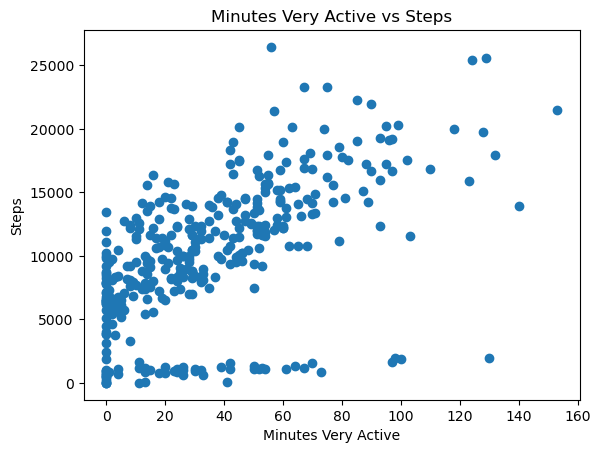

In [18]:
import matplotlib.pyplot as plt

#El diagrama de puntos se saca con ply.scatter y añadiendo las dos variables que relaciono
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])

#Para ponerle nombre a los ejes utilizo plt.xlabel
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')

#Para ponerle título a mi gráfica de puntos utilizo plt.title
plt.title('Minutes Very Active vs Steps')

#Para mostrar mi gráfica de puntos utilizo plt.show()
plt.show()



#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
'''Se observa que hay una relación entre los minutos activos y los pasos, 
aunque no es tan clara como cabría esperar'''

'Se observa que hay una relación entre los minutos activos y los pasos, \naunque no es tan clara como cabría esperar'

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [20]:
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

correlation

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

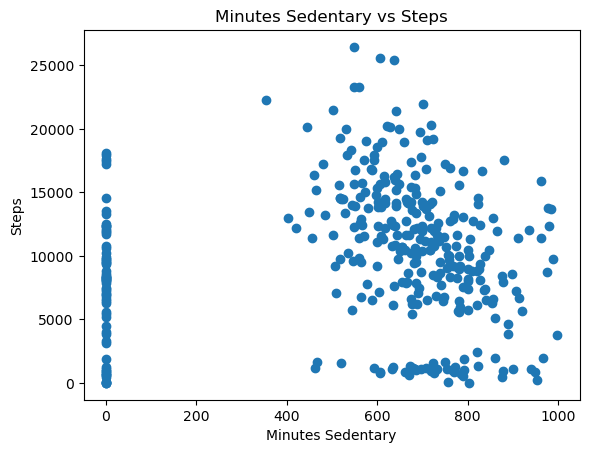

In [21]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])

plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')

plt.title('Minutes Sedentary vs Steps')

plt.show()

In [22]:
'''Aunque parecen estar más correlacionadas que la anterior (un 0,7) en la gráfica 
de puntos no se observa una correlación elevada'''

'Aunque parecen estar más correlacionadas que la anterior (un 0,7) en la gráfica \nde puntos no se observa una correlación elevada'

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

correlation

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

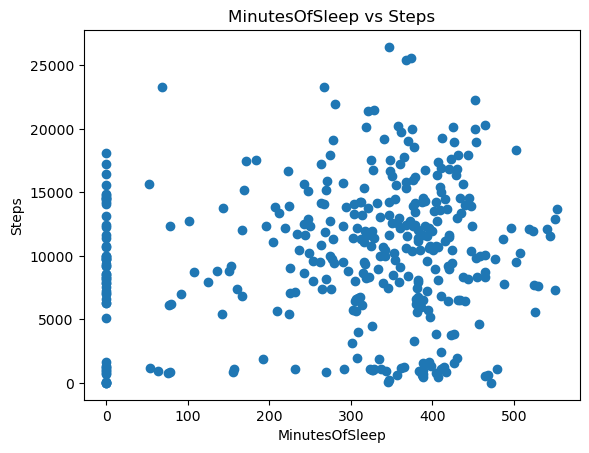

In [24]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')

plt.title('MinutesOfSleep vs Steps')

plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset = fitbit[columns]

cor_fit = subset.corr()

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [26]:

cor_steps = cor_fit['Steps'].sort_values(ascending=False)

cor_steps

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [27]:
time_grades = pd.read_csv('Time_Grades.csv')


In [28]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

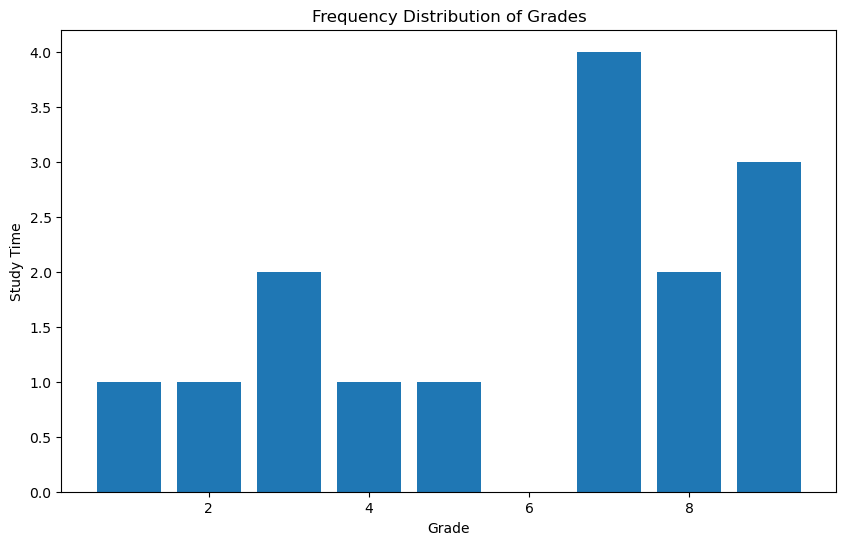

In [29]:
frequency_distribution = time_grades['Grade'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(frequency_distribution.index, frequency_distribution.values)
plt.xlabel('Grade')
plt.ylabel('Study Time')
plt.title('Frequency Distribution of Grades')
plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
import scipy.stats as stats


# Pearson correlation

pearson_corr, _ = stats.pearsonr(time_grades['Study time'], time_grades['Grade'])

pearson_corr

0.7980456073578857

In [34]:
# Spearman correlation
spearman_corr, _ = stats.spearmanr(time_grades['Study time'], time_grades['Grade'])
spearman_corr

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

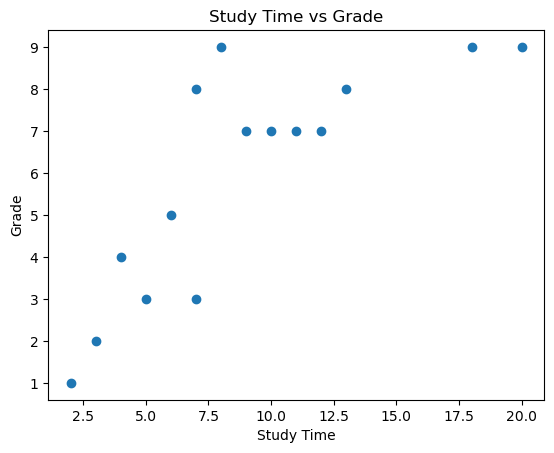

In [35]:
import matplotlib.pyplot as plt
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.title('Study Time vs Grade')
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
'''La correlación de Pearson mide la fuerza y dirección de una relación lineal entre dos variables.
La correlación de Spearman evalúa la relación monotónica entre dos variables, es decir, si la relación es creciente o decreciente sin importar su forma.
La correlación de Pearson requiere que las variables estén normalmente distribuidas y sigan una relación lineal.
La correlación de Spearman es más adecuada cuando las variables no siguen una distribución normal o cuando la relación no es lineal.'''